# HW 2
## Named Entety Recognition and Event Extraction from Literary Fiction

deadline: 12 декабря 2022, 23:59

В этом домашнем задании вы будете работать с корпусом LitBank. Корпус собран из популярных художественных произведений на английском языке и сожержит разметку по именованным сущностям и событиям. Объем корпуса таков: 100 текстов по примерно 2000 слов каждый. 

Корпус описан в статьях:
* David Bamman, Sejal Popat, Sheng Shen, An Annotated Dataset of Literary Entities http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/naacl2019_literary_entities.pdf
* Matthew Sims, Jong Ho Park, David Bamman, Literary Event Detection,  http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/acl2019_literary_events.pdf

Корпус доступен в репозитории проекта:  https://github.com/dbamman/litbank

Статья и код, использованный для извлечения именованных сущностей: 
* Meizhi Ju, Makoto Miwa and Sophia Ananiadou, A Neural Layered Model for Nested Named Entity Recognition, https://github.com/meizhiju/layered-bilstm-crf

Структура корпуса устроена так. 
Первый уровень: 
* entities -- разметка по сущностям
* events -- разметка по сущностям


В корпусе используются 6 типов именованных сущностей: PER, LOC, ORG, FAC, GPE, VEH (имена, локации, организации, помещения, топонимы, средства перемещния), допускаются вложенные сущности. 

События выражается одним словом - *триггером*, которое может быть глагом, прилагательным и существительным. В корпусе описаны события, которые действительно происходят и не имеют гипотетического характера. 
Пример: she *walked* rapidly and resolutely, здесь *walked* -- триггер события. Типы событий не заданы. 



Второй уровень:
* brat -- рабочие файлы инструмента разметки brat, ann-файлы содержат разметку, txt-файлы – сырые тексты 
* tsv -- tsv-файлы содержат разметку в IOB формате,


В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание сдается через github.classroom, инвайты будут высланы.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 


## Часть 1. [3 балла] Эксплоративный анализ 
1. Найдите топ 10 (по частоте) именованных сущностей каждого из 6 типов.
2. Найдите топ 10 (по частоте) частотных триггеров событий. 
3. Кластеризуйте все уникальные триггеры событий, используя эмбеддинги слов и любой алгоритм кластеризации (например, агломеративный иерархический алгоритм кластеризации) и попробуйте проинтерпретировать кластеры: есть ли очевидные типы событий? 

[бонус] Визуализируйте полученные кластеры с помощью TSNE или UMAP

[бонус] Постройте тематическую модель по корпусу и сравните кластеры тригеров и выделенные темы: есть ли схожие паттерны в тематической модели и в стурктуре кластеров?

В следующих частях домашнего задания вам понадобится train-test-dev разбиение. Авторы статей предлагают следующую структуру разбиения: обучающее множество – 80 книг, валидационное – 10 книг, тестовое – 10 книг. Предложения из одного источника не должны попадать в разные сегменты разбиения. 


## Часть 2. [5 баллов] Извлечение именованных сущностей
1. Используйте стандартную (любую предобученную) модель для извлечения именованных сущностей. Продемонстрируйте, какие сущности она извлекает. Вычислите качество работы модели на токенах и на спанах сущностей. Для вычисления качества работы модели используйте seqeval (умеет работать с Huggingface). Какая из метрик получилась выше?

2. Дообучите BERT для извлечения именованных сущностей. 

2. (Как вариант альтернативный обучению BERT) Можно обучить модель CNN-BiLSTM-CRF, для извлечения именованных *низкоуровневых именованных сущностей*, т.е. для самых коротких из вложенных сущностей. 
Модель устроена так: сверточная сеть на символах + эмбеддинги слов + двунаправленная LSTM сеть (модель последовательности) + CRF (глобальная нормализация) 

[бонус] Используйте модель для извлечения вложенных именованных сущностей [Ju et al., 2018] Можно использовать модель из статьи, можно также вместо эмбеддингов слов использовать ELMo и/или BERT. 
 

## Часть 3. [2 балла] Извлечение событий 

1. Используйте BiLSTM на эмбеддингах слов для извлечения триггеров событий. 

2. Замените часть модели на  словах  на ELMo и/или BERT.  Должна получиться модель ELMo / BERT + BiLSTM.

[бонус] Предобучите BiLSTM как языковую модель. Дообучите ее для извлечения триггеров. 

[бонус] Дообучите BERT для извлечения триггеров событий. 

## Часть 4. [2 балла] Одновременное извлечение именованных сущностей и событий 
1. Обучите модель для совместного извлечения именованных сущностей и триггеров событий. У модели должен быть общий энкодер (например, BERT, CNN + BiLSMT, ELMo + BiLSTM, BERT + BiLSTM) и два декодера: один отвечает за извлечение именнованных сущностей, другой отвечает за извлечение триггеров событий.

[бонус] Добавьте в модель механизм внимания, так, как это покажется вам разумным.

[бонус] Визуализируйте карты механизма внимания. 

## Часть 5. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Сравните результаты всех разработанных моделей. Что помогло вам в выполнении работы, чего не хватало?

# Часть 1. [3 балла] Эксплоративный анализ

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import codecs
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def union_tsv(files, fname):
    lines = []
    for path in files:
        for line in codecs.open(path, 'r', 'utf-8'):
            lines.append(line)

    with codecs.open(fname, 'w', 'utf-8') as f:
        f.writelines(lines)

In [ ]:
def load_sentences(path):
    """
    Load sentences. A line must contain at least a word and its tag.
    Sentences are separated by empty lines.
    """
    sentences = []
    sentence = []
    for line in codecs.open(path, 'r', 'utf-8'):
        line = line.rstrip()
        if not line:
            if len(sentence) > 0:
                if 'DOCSTART' not in sentence[0][0]:
                    sentences.append(sentence)
                sentence = []
        else:
            word = line.split()
            assert len(word) >= 2
            sentence.append(word)

    if len(sentence) > 0:
        if 'DOCSTART' not in sentence[0][0]:
            sentences.append(sentence)

    return sentences


In [ ]:
ent_files = glob('data/entities/tsv/*')
ev_files = glob('data/events/tsv/*')

### Именованные сущности:

In [ ]:
ent_name = 'full_entities.tsv'
union_tsv(ent_files, ent_name)
sent = load_sentences(ent_name)
rows = []
for s in sent:
    for i in s:
        rows.append(i)

df_entities = pd.DataFrame(rows)
df_entities.columns = ['word', 'entity1', 'entity2', 'entity3', 'entity4', 'entity5']
df_entities['word'] = df_entities['word'].apply(lambda x: x.lower())

In [ ]:
df_entities['entity1'].unique()

array(['O', 'B-VEH', 'I-VEH', 'B-PER', 'I-PER', 'B-FAC', 'I-FAC', 'B-GPE',
       'I-GPE', 'B-LOC', 'I-LOC', 'B-ORG', 'I-ORG'], dtype=object)

In [ ]:
df_entities['entity2'].unique()


array(['O', 'B-FAC', 'I-FAC', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-VEH',
       'I-VEH', 'B-GPE', 'I-GPE', 'B-ORG', 'I-ORG'], dtype=object)

In [ ]:
df_entities['entity3'].unique()


array(['O', 'B-PER', 'I-PER', 'B-FAC', 'I-FAC', 'B-LOC', 'I-LOC', 'B-GPE',
       'I-GPE', 'B-ORG', 'I-ORG', 'B-VEH', 'I-VEH'], dtype=object)

In [ ]:
df_entities['entity4'].unique()


array(['O', 'B-PER', 'I-PER', 'B-FAC', 'I-FAC', 'B-LOC', 'I-LOC', 'B-ORG',
       'I-ORG'], dtype=object)

In [ ]:
df_entities['entity5'].unique()


array([None, 'O'], dtype=object)

In [ ]:
df_entities = df_entities.drop('entity5', axis=1)

In [ ]:
df_entities = df_entities.melt(id_vars=['word'], var_name='entity_level', value_name='entity_type')
df_entity_only = df_entities.loc[df_entities['entity_type'] != 'O', ['word', 'entity_type']]
df_entity_only['entity_type'] = df_entity_only['entity_type'].apply(lambda x: x[2:])
df_entity_only['count'] = 1
entity_freq = df_entity_only.groupby(['word', 'entity_type'], as_index=False).count()

stops = stopwords.words("english")
entity_freq_without_stop_punct = entity_freq.copy()
entity_freq_without_stop_punct['word'] = entity_freq_without_stop_punct['word'].apply(lambda x: re.sub("[^a-zA-Z]", "", x))
entity_freq_without_stop_punct = entity_freq_without_stop_punct.loc[
    ~entity_freq_without_stop_punct['word'].isin(stops) & (entity_freq_without_stop_punct['word'] != ''), 
    :
]


#### Топ-10 (по частоте) именованных сущностей PER:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'PER'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,PER,2422
1,a,PER,1190
2,of,PER,777
3,",",PER,670
4,his,PER,435
5,man,PER,371
6,my,PER,347
7,mr.,PER,313
8,who,PER,309
9,her,PER,308


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'PER')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,man,PER,371
1,mr,PER,313
2,miss,PER,281
3,mrs,PER,276
4,mother,PER,216
5,father,PER,181
6,men,PER,173
7,young,PER,172
8,one,PER,152
9,old,PER,149


#### Топ-10 (по частоте) именованных сущностей LOC:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'LOC'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,LOC,851
1,of,LOC,196
2,a,LOC,129
3,world,LOC,113
4,",",LOC,64
5,sea,LOC,59
6,and,LOC,53
7,river,LOC,52
8,country,LOC,49
9,this,LOC,42


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'LOC')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,world,LOC,113
1,sea,LOC,59
2,river,LOC,52
3,country,LOC,49
4,earth,LOC,38
5,land,LOC,31
6,water,LOC,24
7,valley,LOC,23
8,woods,LOC,19
9,stream,LOC,19


#### Топ-10 (по частоте) именованных сущностей ORG:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'ORG'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,ORG,87
1,of,ORG,28
2,a,ORG,21
3,army,ORG,20
4,",",ORG,19
5,and,ORG,10
6,church,ORG,8
7,his,ORG,7
8,that,ORG,7
9,company,ORG,7


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'ORG')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,army,ORG,20
1,church,ORG,8
2,company,ORG,7
3,hospital,ORG,6
4,office,ORG,6
5,college,ORG,6
6,colonial,ORG,5
7,hunt,ORG,4
8,school,ORG,4
9,safety,ORG,4


#### Топ-10 (по частоте) именованных сущностей FAC:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'FAC'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,FAC,1278
1,a,FAC,268
2,of,FAC,225
3,house,FAC,167
4,",",FAC,138
5,room,FAC,100
6,home,FAC,87
7,and,FAC,77
8,in,FAC,74
9,his,FAC,74


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'FAC')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,house,FAC,167
1,room,FAC,100
2,home,FAC,87
3,street,FAC,73
4,garden,FAC,59
5,hall,FAC,47
6,old,FAC,45
7,place,FAC,42
8,houses,FAC,30
9,road,FAC,26


#### Топ-10 (по частоте) именованных сущностей GPE:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'GPE'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,GPE,177
1,town,GPE,68
2,of,GPE,55
3,london,GPE,40
4,a,GPE,39
5,england,GPE,38
6,country,GPE,35
7,new,GPE,29
8,village,GPE,27
9,city,GPE,27


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'GPE')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,town,GPE,68
1,london,GPE,40
2,england,GPE,38
3,country,GPE,35
4,new,GPE,29
5,city,GPE,27
6,village,GPE,27
7,york,GPE,23
8,place,GPE,21
9,france,GPE,15


#### Топ-10 (по частоте) именованных сущностей VEH:

In [ ]:
entity_freq[entity_freq['entity_type'] == 'VEH'].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,the,VEH,108
1,a,VEH,33
2,ship,VEH,22
3,car,VEH,15
4,train,VEH,14
5,ships,VEH,12
6,carriage,VEH,10
7,_,VEH,10
8,vessel,VEH,8
9,boats,VEH,8


Если удалить стоп-слова и пунктуацию:

In [ ]:
entity_freq_without_stop_punct[(entity_freq_without_stop_punct['entity_type'] == 'VEH')].sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,word,entity_type,count
0,ship,VEH,22
1,car,VEH,15
2,train,VEH,14
3,ships,VEH,12
4,carriage,VEH,10
5,boats,VEH,8
6,vessel,VEH,8
7,coach,VEH,7
8,waggon,VEH,6
9,fuwalda,VEH,6


### Топ-10 по частоте триггеров событий:

In [ ]:
event_name = 'full_events.tsv'
union_tsv(ev_files, event_name)
sent = load_sentences(event_name)
rows = []
for s in sent:
    for i in s:
        rows.append(i)

df_events = pd.DataFrame(rows)
df_events.columns = ['word', 'event']
df_events['word'] = df_events['word'].apply(lambda x: x.lower())

In [ ]:
df_event_only = df_events[df_events['event'] == 'EVENT']
event_freq = df_event_only.groupby(['word'], as_index=False).count()
event_freq.columns = ['event', 'count']
event_freq = event_freq.sort_values(by='count', ascending=False).reset_index(drop=True)
event_freq.head(10)

,event,count
0,said,465
1,came,95
2,went,92
3,looked,92
4,asked,69
5,heard,63
6,cried,59
7,saw,59
8,took,57
9,turned,55


### Кластеризация уникальных триггеров событий:

#### Обучение эмбеддингов событий:

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3130964 sha256=7f55702b83798356f730284415deabdb654f7507792b7053c113b23a52e582a5
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:
from multiprocessing import Pool
import fasttext

nltk.download('punkt')
nltk.download('stopwords')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def review_to_wordlist(review, remove_stopwords=False ):
    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = stopwords.words("english")
        words = [w for w in words if not w in stops]
    return (words)

def review_to_sentences(review, tokenizer=tokenizer, remove_stopwords=True):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

In [ ]:
files = glob('data/events/brat/*.txt')
texts = pd.Series([open(file).read() for file in tqdm(files)])

with Pool(2) as p:
    sentences = list(tqdm(p.imap(review_to_sentences, texts), total=len(texts)))

flat_sentences = [item for sublist in sentences for item in sublist]
len(flat_sentences)

100%|██████████| 100/100 [00:02<00:00, 44.27it/s]


8687

In [ ]:
with open('event_sentences.txt', 'w') as f:
    for s in flat_sentences:
        f.write(' '.join(s))
        f.write('\n')

In [ ]:
emb_model = fasttext.train_unsupervised('event_sentences.txt', dim=100, minn=3, maxn=6, epoch=3, lr=0.05)

In [ ]:
emb_model.save_model("event_emb_model.bin")

#### Агломеративная иерархическая кластеризация:

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
%%time

emb_model =  fasttext.load_model("event_emb_model.bin")
X = np.array([emb_model[event] for event in event_freq['event']])
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=0.5)

model = model.fit(X)

CPU times: user 1.01 s, sys: 1.22 s, total: 2.22 s
Wall time: 2.58 s


In [ ]:
model.n_clusters_

24

#### Визуализация и интерпретация кластеров:

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
event_clusters = pd.DataFrame()
event_clusters['event'] = event_freq['event']
event_clusters['cluster'] = model.labels_

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet, LinearColorMapper, ColorBar
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from sklearn.decomposition import TruncatedSVD

output_notebook()

svd_20 = TruncatedSVD(n_components=20, random_state=19)
X_20 = svd_20.fit_transform(X)
X_20_tsne = TSNE(n_components=2, random_state=19).fit_transform(X_20)

p = figure(
    tools="pan,wheel_zoom,reset,save",
    toolbar_location="above",
    title="Events clusters T-SNE +SVD"
)

source = ColumnDataSource(
    data=dict(x1=X_20_tsne[:,0], x2=X_20_tsne[:,1], names=event_clusters['event'], color=event_clusters['cluster'])
)

exp_cmap = LinearColorMapper(
    palette="Viridis256", 
    low=event_clusters['cluster'].min(),
    high=event_clusters['cluster'].max()
)

p.scatter(
    x="x1", y="x2", size=10, color="color", 
    source=source, 
    line_color=None, fill_color={"field": "color", "transform": exp_cmap}
)

labels = LabelSet(
    x="x1", y="x2", text="names", y_offset=6,
    text_font_size="8pt", text_color="#555555", #text_alpha=0,
    source=source, text_align='center'
)

bar = ColorBar(color_mapper=exp_cmap, location=(0,0))

p.add_layout(labels)
p.add_layout(bar, "left")

show(p)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


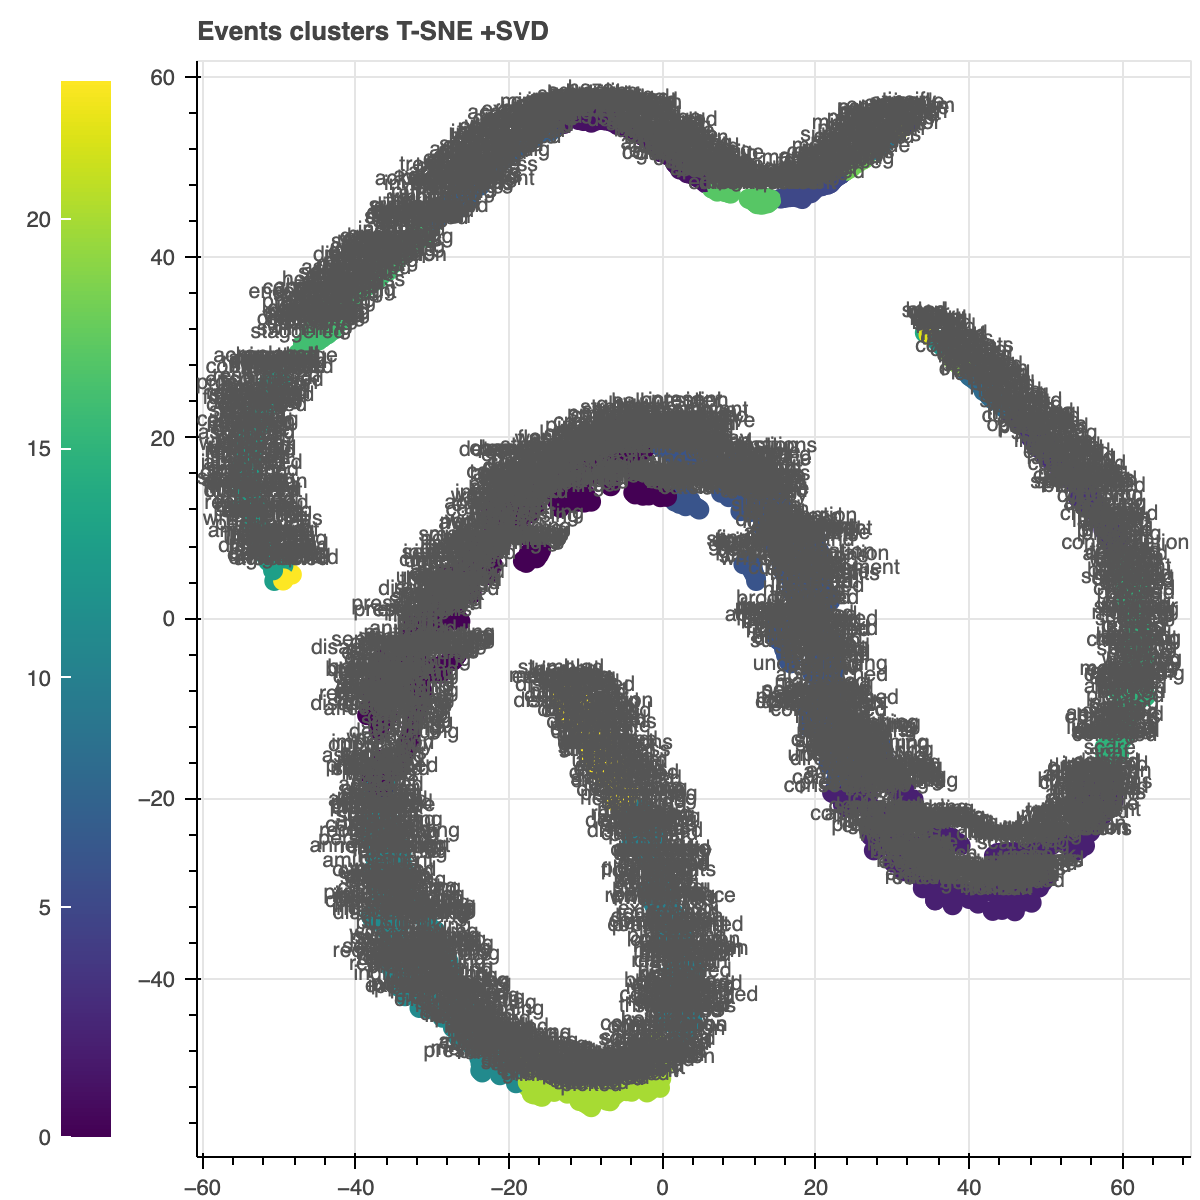

In [ ]:
from IPython.display import Image

Image('bokeh_plot.png')

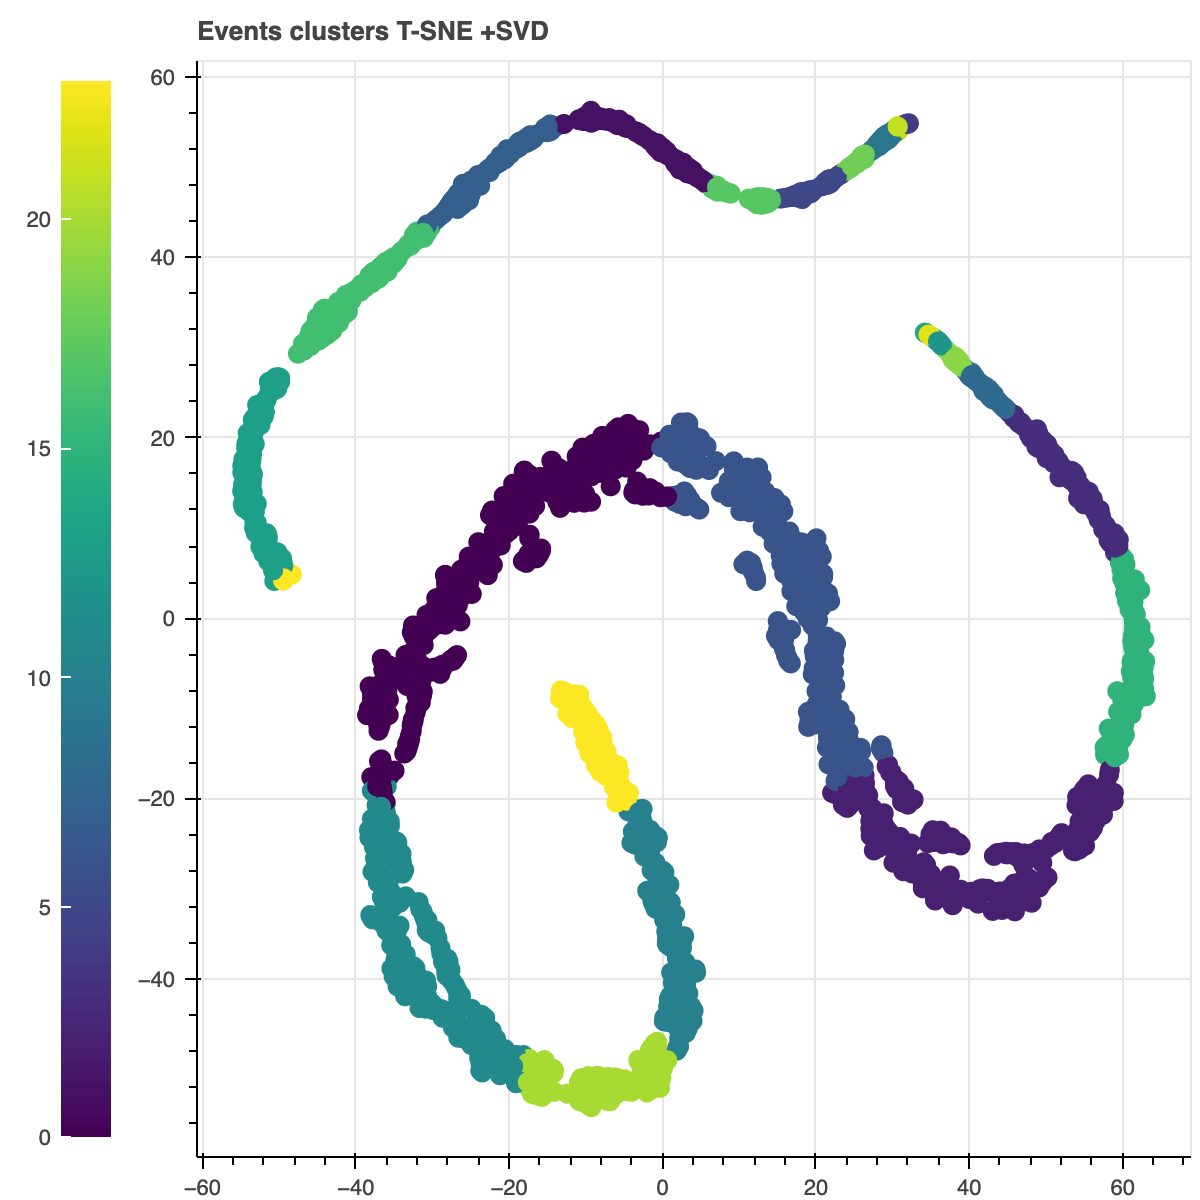

In [ ]:
Image('bokeh_plot (1).png')


In [ ]:
event_clusters[event_clusters['cluster'] == 0].head(15)

,event,cluster
0,said,0
2,went,0
4,asked,0
7,saw,0
8,took,0
20,got,0
21,looking,0
24,replied,0
29,held,0
31,laughed,0


В кластер 0 попали совершенные действия

In [ ]:
event_clusters[event_clusters['cluster'] == 1].head(15)

,event,cluster
419,campfire,1
456,surveying,1
634,odour,1
725,knelt,1
733,gurgling,1
794,abandon,1
895,task,1
908,swore,1
923,breakdown,1
947,afterglow,1


В кластер 1 попала походная тематика - костер, запах, поход, отдых, радость и т.д.

In [ ]:
event_clusters[event_clusters['cluster'] == 6].head(15)

,event,cluster
1,came,6
3,looked,6
5,heard,6
6,cried,6
9,turned,6
10,told,6
11,found,6
14,thought,6
15,come,6
16,left,6


В кластере 6 тоже действия

In [ ]:
event_clusters[event_clusters['cluster'] == 7].head(15)

,event,cluster
261,swung,7
485,encouraged,7
492,grumbled,7
527,rejoined,7
556,beckoned,7
623,shrugged,7
645,outbreak,7
647,outlined,7
752,scoffed,7
765,galloping,7


In [ ]:
event_clusters[event_clusters['cluster'] == 9].head(15)

,event,cluster
465,shriek,9
1126,prophecy,9
1130,witticism,9
1175,yelp,9
1281,stiff-frozen,9
1373,snowfall,9
1381,snarl,9
1427,signify,9
1468,rigid,9
1471,testify,9


В кластере 9 дуэльная тематика - визг, выстрел, проступок и т.д.

In [ ]:
event_clusters[event_clusters['cluster'] == 10].head(15)

,event,cluster
92,explained,10
147,wrote,10
195,flung,10
212,pause,10
217,hesitated,10
238,kissed,10
284,confess,10
290,prepared,10
336,whistling,10
378,fetched,10


В кластере 10 похоже на любовную тематику

In [ ]:
event_clusters[event_clusters['cluster'] == 16].head(15)

,event,cluster
230,tilted,16
339,jerked,16
420,disclosed,16
501,dripping,16
546,wheeled,16
618,queried,16
638,offended,16
650,shuffled,16
659,perfume,16
663,puff,16


В кластере 16 тоже что-то подобное прослеживается

In [ ]:
event_clusters[event_clusters['cluster'] == 23].head(15)

,event,cluster
161,rode,23
388,roar,23
462,exclamation,23
471,depositing,23
489,footsteps,23
543,jump,23
571,blaze,23
590,plunged,23
602,swear,23
613,conjectured,23


В остальных кластерах сложно выделить какую-то общую черту (какие-то кластеры просто очень маленькие)

# Часть 2. [5 баллов] Извлечение именованных сущностей

### 1. Используйте стандартную (любую предобученную) модель для извлечения именованных сущностей. Продемонстрируйте, какие сущности она извлекает. Вычислите качество работы модели на токенах и на спанах сущностей. Для вычисления качества работы модели используйте seqeval (умеет работать с Huggingface). Какая из метрик получилась выше?

In [ ]:
!pip install --quiet datasets evaluate transformers
!pip install --quiet accelerate
!pip install --quiet seqeval

In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive/')
# drive_path = "/content/drive/Shareddrives/hse_NLP_HW2"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !cp -r /content/drive/Shareddrives/hse_NLP_HW2/data .

#### Подгрузим предобученную модель

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

In [ ]:
model.config.label2id

{'B-LOC': 7,
 'B-MISC': 1,
 'B-ORG': 5,
 'B-PER': 3,
 'I-LOC': 8,
 'I-MISC': 2,
 'I-ORG': 6,
 'I-PER': 4,
 'O': 0}

Выше видно, что модель умеет доставать 4 сущности:
- Локации
- Персоны
- Организации
- Смешанные сущности

In [ ]:
from glob import glob
import codecs
import pandas as pd
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np
from torch.utils.data import Dataset, DataLoader
import evaluate
from tqdm import tqdm
import numpy as np

#### Подгрузим данные

In [ ]:
files = glob('data/entities/tsv/*')

In [ ]:
files.__len__()

100

In [ ]:
val = ['data/entities/tsv/113_the_secret_garden_brat.tsv',
 'data/entities/tsv/2084_the_way_of_all_flesh_brat.tsv',
 'data/entities/tsv/1023_bleak_house_brat.tsv',
 'data/entities/tsv/1064_the_masque_of_the_red_death_brat.tsv',
 'data/entities/tsv/829_gullivers_travels_into_several_remote_nations_of_the_world_brat.tsv',
 'data/entities/tsv/521_the_life_and_adventures_of_robinson_crusoe_brat.tsv',
 'data/entities/tsv/711_allan_quatermain_brat.tsv',
 'data/entities/tsv/4051_lady_bridget_in_the_nevernever_land_a_story_of_australian_life_brat.tsv',
 'data/entities/tsv/2775_the_good_soldier_brat.tsv',
 'data/entities/tsv/432_the_ambassadors_brat.tsv']

test = ['data/entities/tsv/932_the_fall_of_the_house_of_usher_brat.tsv',
 'data/entities/tsv/541_the_age_of_innocence_brat.tsv',
 'data/entities/tsv/766_david_copperfield_brat.tsv',
 'data/entities/tsv/110_tess_of_the_durbervilles_a_pure_woman_brat.tsv',
 'data/entities/tsv/95_the_prisoner_of_zenda_brat.tsv',
 'data/entities/tsv/2489_moby_dick_brat.tsv',
 'data/entities/tsv/1155_the_secret_adversary_brat.tsv',
 'data/entities/tsv/11_alices_adventures_in_wonderland_brat.tsv',
 'data/entities/tsv/77_the_house_of_the_seven_gables_brat.tsv',
 'data/entities/tsv/60_the_scarlet_pimpernel_brat.tsv']

In [ ]:
train = [f for f in files if f not in val and f not in test]
len(train)

80

Ниже код для сбора данных в три файла (train/val/test).data.tsv

In [ ]:
lines = []
for path in train:
    for line in codecs.open(path, 'r', 'utf-8'):
        lines.append(line)


In [ ]:
with codecs.open('data/entities/train.data.tsv', 'w', 'utf-8') as f:
    f.writelines(lines)

In [ ]:
def load_sentences(path):
    """
    Load sentences. A line must contain at least a word and its tag.
    Sentences are separated by empty lines.
    """
    sentences = []
    sentence = []
    for line in codecs.open(path, 'r', 'utf-8'):
        line = line.rstrip()
        if not line:
            if len(sentence) > 0:
                if 'DOCSTART' not in sentence[0][0]:
                    sentences.append(sentence)
                sentence = []
        else:
            word = line.split()
            assert len(word) >= 2
            sentence.append(word)

    if len(sentence) > 0:
        if 'DOCSTART' not in sentence[0][0]:
            sentences.append(sentence)

    return sentences

def prepare_sentenses(sents, label2id):
    num_clases = len(sents[0][0]) - 1
    index_for_tags = range(1, num_clases+1)
    dataset = []
    words_data, tags_data = [], []
    for sent in sents:
        dataset.append(
            {
                'tokens': [w[0] for w in sent],
                'ner_tags': [[label2id.get(w[j], 0) for j in index_for_tags][0] for w in sent]
            }
        )

    return dataset

In [ ]:
def load_prepare(path, label2id):
    df = load_sentences(path)
    df = prepare_sentenses(df, label2id)
    return df

Хитрейшая функция для обработки и исправления разметки, нужна так как берт токенайзер может из одного слова сделать несколько токенов, если он не знает слово целиком.

In [ ]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [ ]:
def tokenize_and_align_labels(examples, tokenizer):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True, padding=True)
    tokenized_inputs["labels"] = align_labels_with_tokens(examples["ner_tags"], tokenized_inputs.word_ids(0))
    return tokenized_inputs

#### Напишем кастомный датасет для подгрузки данных

In [ ]:
class NERDataset(Dataset):
    def __init__(self, file: str, label2id, tokenizer):
        file_ = f'data/entities/{file}.data.tsv'
        dataset = load_prepare(file_, label2id)
        tokenized_dataset = [tokenize_and_align_labels(s, tokenizer) for s in dataset]
        self.token_seq = tokenized_dataset
        self.label_seq = [data['labels'] for data in tokenized_dataset]

    def __len__(self):
        return len(self.token_seq)

    def __getitem__(self, idx):
        tokens = self.token_seq[idx]
        labels = self.label_seq[idx]

        lengths = [len(tokens['input_ids'])]

        return np.array(tokens['input_ids']), np.array(tokens['token_type_ids']), np.array(tokens['attention_mask']),  np.array(labels), lengths


class NERCollator:
    def __init__(self,token_padding_value,label_padding_value, percentile = 100):
        self.token_padding_value = token_padding_value
        self.label_padding_value = label_padding_value
        self.percentile = percentile

    def __call__(self, batch):
        input_ids, token_type_ids, attention_mask, labels, lengths = zip(*batch)

        tokens = [list(i) for i in input_ids]
        token_type_ids = [list(i) for i in token_type_ids]
        attention_mask = [list(i) for i in attention_mask]
        labels = [list(i) for i in labels]

        max_len = int(np.percentile(lengths, self.percentile))

        lengths = torch.tensor(
            np.clip(lengths, a_min=0, a_max=max_len),
            dtype=torch.long,
        ).squeeze(-1)

        for i in range(len(batch)):
            tokens[i] = torch.tensor(tokens[i][:max_len], dtype=torch.long)
            token_type_ids[i] = torch.tensor(token_type_ids[i][:max_len], dtype=torch.long)
            attention_mask[i] = torch.tensor(attention_mask[i][:max_len], dtype=torch.long)
            labels[i] = torch.tensor(labels[i][:max_len], dtype=torch.long)

        sorted_idx = torch.argsort(lengths, descending=True)

        tokens = pad_sequence(
            tokens, padding_value=self.token_padding_value, batch_first=True
        )[sorted_idx]
        token_type_ids = pad_sequence(
            token_type_ids, padding_value=self.token_padding_value, batch_first=True
        )[sorted_idx]
        attention_mask = pad_sequence(
            attention_mask, padding_value=0, batch_first=True
        )[sorted_idx]
        labels = pad_sequence(
            labels, padding_value=self.label_padding_value, batch_first=True
        )[sorted_idx]
        lengths = lengths[sorted_idx]

        return {'input_ids': tokens, 
                'token_type_ids':token_type_ids, 
                'attention_mask':attention_mask,
                'labels': labels
                }

In [ ]:
ner_dataset = NERDataset('test', model.config.label2id, tokenizer)

data_collator = NERCollator(
        token_padding_value=0,
        label_padding_value=0,
        percentile=100,
    )

In [ ]:
data_loader = DataLoader(
        dataset=ner_dataset,
        batch_size=2,
        collate_fn=data_collator,
    )

Удобная функция постобработки

In [ ]:
def postprocess(predictions, labels, label_names):
    predictions = predictions.detach().cpu().clone().numpy()
    labels = labels.detach().cpu().clone().numpy()

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    return true_labels, true_predictions

#### Инференс модели по тестовому датасету

In [ ]:
preds, trues = [], []
label_names = model.config.id2label
for batch in tqdm(data_loader):
  outputs = model(**batch)
  predictions = outputs.logits.argmax(dim=-1)
  labels = batch["labels"]
  predictions, labels = postprocess(predictions, labels, label_names)
  preds.extend(predictions)
  trues.extend(labels)


100%|██████████| 406/406 [01:36<00:00,  4.20it/s]


In [ ]:
metric = evaluate.load("seqeval")

metric.compute(predictions=preds, references=trues, mode='strict', scheme='IOB2')

/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'LOC': {'precision': 0.052083333333333336,
  'recall': 0.027472527472527472,
  'f1': 0.03597122302158274,
  'number': 182},
 'MISC': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 108},
 'ORG': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 34},
 'PER': {'precision': 0.11390728476821192,
  'recall': 0.1841541755888651,
  'f1': 0.14075286415711946,
  'number': 467},
 'overall_precision': 0.10606060606060606,
 'overall_recall': 0.11504424778761062,
 'overall_f1': 0.11036992116434204,
 'overall_accuracy': 0.8986126257118624}

#### Теперь поменяем лейблы на классы и посмотрим какая метрика будет если считать не спанами, а токенами

In [ ]:
label2class = {'B-LOC': 7,
 'B-MISC': 1,
 'B-ORG': 5,
 'B-PER': 3,
 'I-LOC': 7,
 'I-MISC': 1,
 'I-ORG': 5,
 'I-PER': 3,
 'O': 0}

In [ ]:
class_preds = []
for f in preds:
  for k in f:
    class_preds.append(label2class[k])

class_trues = []
for f in trues:
  for k in f:
    class_trues.append(label2class[k])

In [ ]:
from sklearn.metrics import classification_report

m = classification_report(class_trues, class_preds, target_names=['O', 'MISC', 'PER', 'ORG', 'LOC'], zero_division=0)
print(m)

              precision    recall  f1-score   support

           O       0.97      0.93      0.95     31628
        MISC       0.00      0.00      0.00       178
         PER       0.16      0.59      0.25       714
         ORG       0.57      0.15      0.23       109
         LOC       0.09      0.08      0.09       383

    accuracy                           0.90     33012
   macro avg       0.36      0.35      0.30     33012
weighted avg       0.94      0.90      0.92     33012



**Итог:** Видим, что если считать не спанами, а по токенам, то метрика сильно выше получается, оно и логично, если учитывать, что спан это дополнительное ограничение (усложнение) для подсчета метркии.

### 2. Дообучите BERT для извлечения именованных сущностей.

#### Во первых зададим классы, которые должна предсказывать модель

In [ ]:
id2label = {
    0: "O",
    1: "B-FAC",
    2: "I-FAC",
    3: "B-PER",
    4: "I-PER",
    5: "B-ORG",
    6: "I-ORG",
    7: "B-LOC",
    8: "I-LOC",
    9: "B-GPE",
    10: "I-GPE",
    11: "B-VEH",
    12: "I-VEH",
}
label2id = {
    "O": 0,
    "B-FAC": 1,
    "I-FAC": 2,
    "B-PER": 3,
    "I-PER": 4,
    "B-ORG": 5,
    "I-ORG": 6,
    "B-LOC": 7,
    "I-LOC": 8,
    "B-GPE": 9,
    "I-GPE": 10,
    "B-VEH": 11,
    "I-VEH": 12,
}

Поддгрузим модель bert-base-uncased

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForTokenClassification.from_pretrained(
    "bert-base-uncased", num_labels=13, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

Функция для подсчета метрик

In [ ]:
import numpy as np

label_names = model.config.id2label
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

Создаем датасеты

In [ ]:
train_dataset = NERDataset('train', model.config.label2id, tokenizer)
val_dataset = NERDataset('val', model.config.label2id, tokenizer)

Используем стандартный трейнер из transformers

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
%%time

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6997
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 876
  Number of trainable parameters = 108901645


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.082781,0.577054,0.711893,0.637420,0.975228
2,0.139100,0.078455,0.631811,0.718593,0.672414,0.976592


***** Running Evaluation *****
  Num examples = 754
  Batch size = 16
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to my_awesome_model/checkpoint-438
Configuration saved in my_awesome_model/checkpoint-438/config.json
Model weights saved in my_awesome_model/checkpoint-438/pytorch_model.bin
tokenizer config file saved in my_awesome_model/checkpoint-438/tokenizer_config.json
Special tokens file saved in my_awesome_model/checkpoint-438/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 754
  Batch size = 16
Saving model checkpoint to my_awesome_model/checkpoint-876
Configuration saved in my_awesome_model/checkpoint-876/config.json
Model weights saved in my_awesome_model/checkpoint-876/pytorch_model.

CPU times: user 3min 29s, sys: 17.5 s, total: 3min 47s
Wall time: 3min 53s


TrainOutput(global_step=876, training_loss=0.10409966560259257, metrics={'train_runtime': 233.0103, 'train_samples_per_second': 60.057, 'train_steps_per_second': 3.759, 'total_flos': 546813245711682.0, 'train_loss': 0.10409966560259257, 'epoch': 2.0})

In [ ]:
best_model = trainer.model

Пробежимся по тестовому датасету используя лучшую модель из треинера

In [ ]:
ner_dataset = NERDataset('test', best_model.config.label2id, tokenizer)
label_names = best_model.config.id2label
data_loader = DataLoader(
        dataset=ner_dataset,
        batch_size=2,
        collate_fn=data_collator,
    )

preds, trues = [], []
for batch in tqdm(data_loader):
  batch = {k: v.to('cuda') for k, v in batch.items()}
  outputs = best_model(**batch)
  predictions = outputs.logits.argmax(dim=-1)
  labels = batch["labels"]
  predictions, labels = postprocess(predictions, labels, label_names)
  preds.extend(predictions)
  trues.extend(labels)

100%|██████████| 406/406 [00:06<00:00, 67.29it/s]


In [ ]:
metric = evaluate.load("seqeval")

metric.compute(predictions=preds, references=trues, mode='strict', scheme='IOB2')

/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'FAC': {'precision': 0.5838150289017341,
  'recall': 0.5372340425531915,
  'f1': 0.559556786703601,
  'number': 188},
 'GPE': {'precision': 0.7340425531914894,
  'recall': 0.69,
  'f1': 0.711340206185567,
  'number': 100},
 'LOC': {'precision': 0.5,
  'recall': 0.5714285714285714,
  'f1': 0.5333333333333333,
  'number': 84},
 'ORG': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 0},
 'PER': {'precision': 0.7708609271523179,
  'recall': 0.7480719794344473,
  'f1': 0.7592954990215265,
  'number': 778},
 'VEH': {'precision': 0.4,
  'recall': 0.6666666666666666,
  'f1': 0.5,
  'number': 18},
 'overall_precision': 0.703030303030303,
 'overall_recall': 0.6952054794520548,
 'overall_f1': 0.6990959965561774,
 'overall_accuracy': 0.9516169309526782}

# Часть 3. [2 балла] Извлечение событий

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import codecs
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
def load_sentences(path, stop_tokens = {}):
    """
    Load sentences. A line must contain at least a word and its tag.
    Sentences are separated by empty lines.
    """
    sentences = []
    sentence = []
    for line in codecs.open(path, 'r', 'utf-8'):
        line = line.rstrip()
        if not line:
            if len(sentence) > 0:
                if 'DOCSTART' not in sentence[0][0]:
                    sentences.append(sentence)
                sentence = []
        else:
            word = line.split()
            assert len(word) >= 2
            if word[0] not in stop_tokens:
                sentence.append(word)

    if len(sentence) > 0:
        if 'DOCSTART' not in sentence[0][0]:
            sentences.append(sentence)

    return sentences


## model

In [ ]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim

Код модели:

In [ ]:
# Author: Robert Guthrie
# Source: https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html#bi-lstm-conditional-random-field-discussion

def argmax(vec):
    # return the argmax as a python int
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + \
        torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))
        
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim,
                 use_prepared_embeddings = False):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)
        self.use_prepared_embeddings = use_prepared_embeddings
        if not self.use_prepared_embeddings:
            self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        if self.use_prepared_embeddings:
            embeds = sentence.view(len(sentence), 1, -1)
        else:
            embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)

        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score

    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

## Train model

Загружаем данные

In [ ]:
path_to_tsvs = os.path.join("data", "events", "tsv")
files = os.listdir(path_to_tsvs)
full_training_data = []
for file in files:
    sentences = load_sentences(os.path.join(path_to_tsvs, file), stop_tokens = '')
    sentences = list(map(lambda x: list(zip(*x)), sentences))
    full_training_data.extend(sentences)
full_training_data = np.array(full_training_data, dtype=object)
full_training_data.shape

(8562, 2)

Деление выборки на обучающую и тестовую

In [ ]:
train_idx, test_idx = train_test_split(np.arange(full_training_data.shape[0]), test_size = 0.3, random_state = 42, shuffle = True)
training_data = full_training_data[train_idx]
test_data = full_training_data[test_idx]

Обучение модели

In [ ]:
START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 512
HIDDEN_DIM = 1024
NUM_EPOCH = 5

torch.manual_seed(42)

#  собираем все унмкальные токены
word_to_ix = {}
for sentence, tags in full_training_data:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

# словари для кодирования таргета
tag_to_ix = {tag: ix for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}
ix_to_tag = {ix: tag for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}

# объявляем модель и оптимизатор
model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# учим модель
for epoch in trange(NUM_EPOCH):
    for sentence, tags in tqdm(training_data, total = len(training_data)):
        model.zero_grad()
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)

        loss = model.neg_log_likelihood(sentence_in, targets)

        loss.backward()
        optimizer.step()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

Получение и оценка предсказаний для тестовой выборки

In [ ]:
EMBEDDING_DIM = 512
HIDDEN_DIM = 1024
NUM_EPOCH = 5

predicted = []
true_data = []
with torch.no_grad():
    for sentence in tqdm(test_data, total = len(test_data)):
        true_data.extend(sentence[1])
        
        precheck_sent = prepare_sequence(sentence[0], word_to_ix)
        predicted.extend(model(precheck_sent)[1])
        
        
m = classification_report(true_data, [ix_to_tag[i] for i in predicted], target_names=list(set(true_data)), zero_division=0, digits=4)
print(m)

  0%|          | 0/2569 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       EVENT     0.6846    0.4658    0.5544      2265
           O     0.9802    0.9919    0.9860     60293

    accuracy                         0.9729     62558
   macro avg     0.8324    0.7289    0.7702     62558
weighted avg     0.9695    0.9729    0.9704     62558



Модель показала неплохие результаты, далее сравним с моделью с использованием BERT эмбедингов

## BERT based LSTM

In [ ]:
from transformers import BertTokenizer, BertModel, BertTokenizerFast

# загрузка модели и токенизатора берта
bert_model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_tokenized_sentence(sentence, tokenizer, tag_to_ix):
    # токенизация текстов
    tokenized_inputs = tokenizer(sentence[0], truncation=True, is_split_into_words=True)
    # перераспределение меток классов
    tokenized_inputs["labels"] = np.concatenate([[tag_to_ix["O"]],
                                                np.array([tag_to_ix[tag] for tag in sentence[1]])[tokenized_inputs.word_ids()[1:-1]],
                                                [tag_to_ix["O"]]])
    return tokenized_inputs

# Получение эмбединнгов
def get_embeddings(tokens_tensor, attention_mask, model):
    with torch.no_grad():
        outputs = model(tokens_tensor, attention_mask)
        hidden_states = outputs[2][1:]
    token_embeddings = hidden_states[-1]
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    return token_embeddings

In [ ]:
# пример работы токенизатора
tokenized_inputs = get_tokenized_sentence(sentence, tokenizer, tag_to_ix)
token_embeddings = get_embeddings(torch.tensor([tokenized_inputs["input_ids"]]), 
                                       torch.tensor([tokenized_inputs["attention_mask"]]), 
                                       bert_model)
tokenized_inputs

{'input_ids': [101, 1523, 2008, 1010, 1524, 2056, 1037, 2376, 1999, 2014, 4540, 1010, 1523, 2003, 2028, 1997, 1996, 3653, 6916, 4355, 2210, 16511, 1999, 5273, 1012, 1524, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])}

Обучение LSTM модели с использованием эмбеддингов BERT

In [ ]:
START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 768
HIDDEN_DIM = 512
NUM_EPOCH = 3

torch.manual_seed(42)

# словари для кодирования таргета
tag_to_ix = {tag: ix for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}
ix_to_tag = {ix: tag for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}

# объявляем модель и оптимизатор
lstm_model_with_bert = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM,
                   use_prepared_embeddings = True)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# обучение модели
for epoch in trange(NUM_EPOCH):
    for sentence in tqdm(training_data, total = len(training_data)):
        lstm_model_with_bert.zero_grad()

        # токенизация предложения
        tokenized_inputs = get_tokenized_sentence(sentence, tokenizer, tag_to_ix)
        token_embeddings = get_embeddings(torch.tensor([tokenized_inputs["input_ids"]]), 
                                            torch.tensor([tokenized_inputs["attention_mask"]]), 
                                            bert_model)
        
        targets = torch.tensor(tokenized_inputs["labels"], dtype=torch.long)
        loss = lstm_model_with_bert.neg_log_likelihood(token_embeddings, targets)
        loss.backward()
        optimizer.step()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

In [ ]:
predicted_bert = []
true_data_bert = []
with torch.no_grad():
    for sentence in tqdm(test_data, total = len(test_data)):
        
        
        tokenized_inputs = get_tokenized_sentence(sentence, tokenizer, tag_to_ix)
        token_embeddings = get_embeddings(torch.tensor([tokenized_inputs["input_ids"]]), 
                                            torch.tensor([tokenized_inputs["attention_mask"]]), 
                                            bert_model)
        
        true_data_bert.extend(list(tokenized_inputs["labels"]))
        predicted_bert.extend(lstm_model_with_bert(token_embeddings)[1])
        
m = classification_report([ix_to_tag[i] for i in list(true_data_bert)],
                          [ix_to_tag[i] for i in list(predicted_bert)], 
                          target_names=list(set([ix_to_tag[i] for i in list(true_data_bert)])),
                          zero_division=0,
                          digits=4)
print(m)

  0%|          | 0/2569 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       EVENT     0.0142    0.0253    0.0182      2606
           O     0.9635    0.9362    0.9496     71565

    accuracy                         0.9042     74171
   macro avg     0.4889    0.4807    0.4839     74171
weighted avg     0.9301    0.9042    0.9169     74171



Качество модели упало

В этот раз количество токенов для классифиувции больше, т.к. при токенизации в модели BERT некоторые токены разбиваются на составляющие, при этом метка класса проставляется всем частям токена. Модель BERT не дообучивалась.

Версия BiLSTM модели без BERT, показала более высокое качество. В этой модели с нуля были обучены эмбеддинги токенов, что дало возможность лкчше обучиться под конкретную задачу.

# Часть 4. [2 балла] Одновременное извлечение именованных сущностей и событий

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import codecs
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
def union_tsv(files, fname):
    lines = []
    for path in files:
        for line in codecs.open(path, 'r', 'utf-8'):
            lines.append(line)

    with codecs.open(fname, 'w', 'utf-8') as f:
        f.writelines(lines)

def load_sentences(path, stop_tokens = {}):
    """
    Load sentences. A line must contain at least a word and its tag.
    Sentences are separated by empty lines.
    """
    sentences = []
    sentence = []
    for line in codecs.open(path, 'r', 'utf-8'):
        line = line.rstrip()
        if not line:
            if len(sentence) > 0:
                if 'DOCSTART' not in sentence[0][0]:
                    sentences.append(sentence)
                sentence = []
        else:
            word = line.split()
            assert len(word) >= 2
            if word[0] not in stop_tokens:
                sentence.append(word)

    if len(sentence) > 0:
        if 'DOCSTART' not in sentence[0][0]:
            sentences.append(sentence)

    return sentences


In [ ]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim

##Энкодер -- предобученный берт

В качестве энкодера был взят предобученный берта в качестве декодера была взята модель из 3 задания, адаптированная под мультилейбл 

In [ ]:
# Author: Robert Guthrie
# Source: https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html#bi-lstm-conditional-random-field-discussion

def argmax(vec):
    # return the argmax as a python int
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + \
        torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))
        
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim, num_tasks,
                 use_prepared_embeddings = False):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)
        self.num_tasks = num_tasks
        self.use_prepared_embeddings = use_prepared_embeddings
        if not self.use_prepared_embeddings:
            self.word_embeds = nn.Embedding(vocab_size, embedding_dim)

        
        self.lstm = nn.ModuleList([nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True) for i in range(num_tasks)])
        self.hidden2tag = nn.ModuleList([nn.Linear(hidden_dim, self.tagset_size) for i in range(num_tasks)])
        self.transitions = nn.ParameterList([nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size)) for i in range(num_tasks)])
        for i in range(num_tasks):
            self.transitions[i].data[tag_to_ix[START_TAG], :] = -10000
            self.transitions[i].data[:, tag_to_ix[STOP_TAG]] = -10000
        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2).to(device),
                torch.randn(2, 1, self.hidden_dim // 2).to(device))

    def _forward_alg(self, feats, i):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.).to(device)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size).to(device)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[i][next_tag].view(1, -1).to(device)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1).to(device)
        terminal_var = forward_var + self.transitions[i][self.tag_to_ix[STOP_TAG]].to(device)
        alpha = log_sum_exp(terminal_var).to(device)
        return alpha

    def _get_lstm_features(self, sentence, i):
        self.hidden = self.init_hidden()
        if self.use_prepared_embeddings:
            embeds = sentence.view(len(sentence), 1, -1).to(device)
        else:
            embeds = self.word_embeds(sentence).view(len(sentence), 1, -1).to(device)
        lstm_out, self.hidden = self.lstm[i](embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim).to(device)
        lstm_feats = self.hidden2tag[i](lstm_out).to(device)
        return lstm_feats

    def _score_sentence(self, feats, tags, task):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1).to(device)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long).to(device), tags]).to(device)
        for i, feat in enumerate(feats):
            score = score + self.transitions[task][tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[task][self.tag_to_ix[STOP_TAG], tags[-1]]
        return score

    def _viterbi_decode(self, feats, i):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[i][next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[i][self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags, i):
        feats = self._get_lstm_features(sentence, i)
        forward_score = self._forward_alg(feats, i)
        gold_score = self._score_sentence(feats, tags, i)
        return forward_score - gold_score

    def loss(self, sentence, multi_tags):
        loss_values = 0.
        if self.num_tasks>1:
            for i in range(self.num_tasks):
                loss_values += self.neg_log_likelihood(sentence, multi_tags[i],i)
        else:
            loss_values += self.neg_log_likelihood(sentence, multi_tags, 0)
        return loss_values

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        scores = torch.zeros(self.num_tasks)
        tags = torch.zeros((len(sentence),self.num_tasks))
        for i in range(self.num_tasks):
            lstm_feats = self._get_lstm_features(sentence, i)

            # Find the best path, given the features.
            score, tag_seq = self._viterbi_decode(lstm_feats, i)
            scores[i] = score
            tags[:,i] = torch.tensor(tag_seq, dtype = torch.int16)
        return scores, tags

In [ ]:
path_to_tsvs = os.path.join("data", "events", "tsv")
files = os.listdir(path_to_tsvs)
full_training_data_ev = []
for file in files:
    sentences = load_sentences(os.path.join(path_to_tsvs, file), stop_tokens = '')
    sentences = list(map(lambda x: list(zip(*x)), sentences))
    full_training_data_ev.extend(sentences)
full_training_data_ev = np.array(full_training_data_ev, dtype=object)
full_training_data_ev.shape

(8562, 2)

In [ ]:
path_to_tsvs = os.path.join("data", "entities", "tsv")
files =os.listdir(path_to_tsvs)
full_training_data_ner = []
for file in files:
    sentences = load_sentences(os.path.join(path_to_tsvs, file), stop_tokens = '')
    sentences = list(map(lambda x: list(zip(*x)), sentences))
    full_training_data_ner.extend(sentences)
full_training_data_ner = np.array(full_training_data_ner, dtype=object)
full_training_data_ner.shape

(8562,)

In [ ]:
full_training_data_ner = np.array([x[0:2] for x in full_training_data_ner],dtype = object)
full_training_data_ner.shape

(8562, 2)

In [ ]:
full_training_data_ner

array([[('CHAPTER', 'I', '1801', '.'), ('O', 'O', 'O', 'O')],
       [('--', 'I', 'have', 'just', 'returned', 'from', 'a', 'visit', 'to', 'my', 'landlord', '--', 'the', 'solitary', 'neighbour', 'that', 'I', 'shall', 'be', 'troubled', 'with', '.'),
        ('O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O')],
       [('This', 'is', 'certainly', 'a', 'beautiful', 'country', '!'),
        ('O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O')],
       ...,
       [('His', 'nature', 'was', 'a', 'noble', 'one', ',', 'and', 'had', 'saved', 'him', 'from', 'all', 'mean', 'faults', '.'),
        ('O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O')],
       [('I', 'hope', 'my', 'young', 'readers', 'will', 'like', 'him', 'as', 'I', 'do', ',', 'without', 'being', 'blind', 'to', 'his', 'faults', '.'),
        ('O', 'O', 'B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 

##Обьединение NER и Events датасетов 

In [ ]:
# full_training_data = np.delete(np.hstack((full_training_data_ner,
#            full_training_data_ev)),5,1)
full_training_data = np.delete(np.hstack((full_training_data_ner,
           full_training_data_ev)),2,1)

In [ ]:
train_idx, test_idx = train_test_split(np.arange(full_training_data.shape[0]), test_size = 0.3, random_state = 42, shuffle = True)
training_data = full_training_data[train_idx]
test_data = full_training_data[test_idx]

In [ ]:
training_data.shape

(5993, 3)

##Модель трансформер с двумя декодерами
Объединение двух декодеров в одну модель с общим лоссом 

In [ ]:
from transformers import BertModel, BertForTokenClassification, BertTokenizer, BertModel, BertTokenizerFast


class BERT_2_Decoders(nn.Module):
    def __init__(self, decoder1, decoder2):
        super(BERT_2_Decoders, self).__init__()

        self.decoder1 = decoder1
        self.decoder2 = decoder2
    def loss(self,sentence, targets_ev, targets_ner):
        loss_ev = self.decoder1.loss(sentence, targets_ev)
        loss_ner = self.decoder2.loss(sentence, targets_ner)
        return loss_ev + loss_ner 
    
    def forward(self, sentence):
        # embeddings = self.encoder(sentence)
        score1, tag1= self.decoder1.forward(sentence)
        score2, tag2 = self.decoder2.forward(sentence)
        return torch.cat((tag1,tag2),1)


токенайзер аналогичный 3 части 

In [ ]:

def get_tokenized_sentence(sentence, tokenizer, tag_to_ix, num_labels = 1, col_num = None):
    # токенизация текстов
    tokenized_inputs = tokenizer(sentence[0], truncation=True, is_split_into_words=True)
    # перераспределение меток классов
    if num_labels == 1:
        tokenized_inputs["labels"] = np.concatenate([[tag_to_ix["O"]],
                                                np.array([tag_to_ix[tag] for tag in sentence[-1 if not col_num else col_num]])[tokenized_inputs.word_ids()[1:-1]],
                                                [tag_to_ix["O"]]])
    else:
        tokenized_inputs["labels"] = np.array([np.concatenate([[tag_to_ix["O"]],
                                                np.array([tag_to_ix[tag] for tag in sentence[i]])[tokenized_inputs.word_ids()[1:-1]],
                                                [tag_to_ix["O"]]]) for i in range(1,num_labels+1)])


    return tokenized_inputs

# Получение эмбединнгов
def get_embeddings(tokens_tensor, attention_mask, model):
    with torch.no_grad():
        outputs = model(tokens_tensor, attention_mask)
        hidden_states = outputs[2][1:]
    token_embeddings = hidden_states[-1]
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    return token_embeddings

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

encoder = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,).to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##Обучение и проверка качества на тесте

In [ ]:
START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 768
HIDDEN_DIM_EV = 16
HIDDEN_DIM_NER = 16

NUM_EPOCH = 3

torch.manual_seed(42)

#  собираем все унмкальные токены
word_to_ix = {}
for sentence, tag1, tag2 in training_data:#, tag3, tag4, tag5 in training_data:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

# словари для кодирования таргета
tag_to_ix = {tag: ix for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}
ix_to_tag = {ix: tag for ix, tag in enumerate(["O","EVENT", START_TAG, STOP_TAG])}
ner_to_ix = {tag: ix for ix, tag in (enumerate(['B-FAC','B-GPE','B-LOC','B-PER','B-VEH','I-ORG','B-ORG','I-FAC','I-GPE','I-LOC','I-PER','I-VEH','O',START_TAG, STOP_TAG]))}
ix_to_ner = {ix: tag for ix, tag in (enumerate(['B-FAC','B-GPE','B-LOC','B-PER','B-VEH','I-ORG','B-ORG','I-FAC','I-GPE','I-LOC','I-PER','I-VEH','O',START_TAG, STOP_TAG]))}

# объявляем модель и оптимизатор
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#BertModel.from_pretrained("bert-base-uncased").cuda().embeddings.word_embeddings
decoder1 = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM_EV, 1, True).to(device)
decoder2 = BiLSTM_CRF(len(word_to_ix), ner_to_ix, EMBEDDING_DIM, HIDDEN_DIM_NER, 1, True).to(device)
model = BERT_2_Decoders(decoder1, decoder2).to(device)#, len(word_to_ix), tag_to_ix,ner_to_ix, EMBEDDING_DIM, HIDDEN_DIM).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# учим модель
for epoch in trange(NUM_EPOCH):
    for sentence in tqdm(training_data, total = len(training_data)):
        model.zero_grad()
        tokenized_inputs_ev = get_tokenized_sentence(sentence, tokenizer, tag_to_ix)
        tokenized_inputs_ner = get_tokenized_sentence(sentence, tokenizer, ner_to_ix,1,1)
        token_embeddings = get_embeddings(torch.tensor([tokenized_inputs_ev["input_ids"]]).to(device), 
                                            torch.tensor([tokenized_inputs_ev["attention_mask"]]).to(device), 
                                            encoder).to(device)
        targets_ev = torch.tensor(tokenized_inputs_ev["labels"], dtype=torch.long).to(device)
        targets_ner = torch.tensor(tokenized_inputs_ner["labels"], dtype=torch.long).to(device)
        loss = model.loss(token_embeddings, targets_ev, targets_ner)

        loss.backward()
        optimizer.step()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

  0%|          | 0/5993 [00:00<?, ?it/s]

In [ ]:
predicted_bert = {}
true_data_bert = {}
true_data_bert[0] = []
predicted_bert[0] = []
with torch.no_grad():
    for sentence in tqdm(test_data, total = len(test_data)):
        
        
        tokenized_inputs_ev = get_tokenized_sentence(sentence, tokenizer, tag_to_ix)
        tokenized_inputs_ner = get_tokenized_sentence(sentence, tokenizer, ner_to_ix,1,1)
        token_embeddings = get_embeddings(torch.tensor([tokenized_inputs_ev["input_ids"]]), 
                                            torch.tensor([tokenized_inputs_ev["attention_mask"]]), 
                                            encoder).to(device)
        outputs = model(token_embeddings)
        true_data_bert[0].extend(list(tokenized_inputs_ev["labels"]))
        predicted_bert[0].extend(model(token_embeddings)[:,0].int().tolist())
        for i in range(1,outputs.shape[1]):
            if i in true_data_bert:
                true_data_bert[i].extend(list(tokenized_inputs_ner["labels"]))#[i-1]))
                predicted_bert[i].extend(model(token_embeddings)[:,i].int().tolist())
            else:
                true_data_bert[i] = list(tokenized_inputs_ner["labels"])#[i-1])
                predicted_bert[i] = model(token_embeddings)[:,i].int().tolist()

m = {}
for k in predicted_bert: 
    if k != 0 :       
        m[k] = classification_report([ix_to_ner[i] for i in list(true_data_bert[k])],
                            [ix_to_ner[i] for i in list(predicted_bert[k])], 
                            target_names=list(set([ix_to_ner[i] for i in list(true_data_bert[k])])),
                            zero_division=0,
                            digits=4)
    else:
        m[k] = classification_report([ix_to_tag[i] for i in list(true_data_bert[k])],
                          [ix_to_tag[i] for i in list(predicted_bert[k])], 
                          target_names=list(set([ix_to_tag[i] for i in list(true_data_bert[k])])),
                          zero_division=0,
                          digits=4)

  0%|          | 0/2569 [00:00<?, ?it/s]

In [ ]:
for k in m:
    print(m[k])

              precision    recall  f1-score   support

       EVENT     0.8038    0.5675    0.6653      2606
           O     0.9844    0.9950    0.9897     71565

    accuracy                         0.9799     74171
   macro avg     0.8941    0.7812    0.8275     74171
weighted avg     0.9781    0.9799    0.9783     74171

              precision    recall  f1-score   support

       B-PER     0.5862    0.5401    0.5622       598
       B-GPE     0.6147    0.5938    0.6040       352
       B-ORG     0.6824    0.3841    0.4915       302
       B-FAC     0.0000    0.0000    0.0000        29
       B-VEH     0.7795    0.7582    0.7687      2854
       I-FAC     0.6000    0.0577    0.1053        52
       I-ORG     0.5260    0.5492    0.5374      1087
       B-LOC     0.5385    0.2311    0.3234       212
       I-LOC     0.6357    0.3346    0.4384       532
       I-VEH     0.0000    0.0000    0.0000        81
       I-GPE     0.7350    0.4979    0.5936      4228
       I-PER     0.7778 

Модель по итогу получилась средней
триггеры предсказываются лучше чем NER
возможно стоит поиграться с весами лосов для улучшения модели 

# Часть 5. [1 балл] Итоги

В эксплоративном анализе данных посмотрели на именованные сущности и события. Среди сущностей было много стоп-слов и пунктуации, поэтому пришлось почистить. Также была сделана кластеризация триггеров событий. В некоторых кластерах удалось уловить паттерны.

В работе: решили задачу NER с помощью пред обученной модели и с помощью дообученной модели.
Видим, что модель, которая не обучалась на наших данных не бесполезна и что-то может, но всё таки, как и предполагалось дообученная модель показывает метрики лучше.
Решение задачи средствами библиотеки Transformers подгоняет решение в определенные рамки (под определенный интерфейс). Это несомненно плюс, так как можно будет легко подменять модели и перебрать другие варианты, загруженные на huggingface.

Как и ожидалось, качество модели BiLSTM, обучаемой под конкретную задачу, выше.
BERT является более универсльной моделью и без дообучения качество может оказаться хуже. 